# Neural Networks: Hand Sign Detection
### Welcome to homework 2  &#128522;&#9996;

We will start by loading the packages:

In [1]:
import os
import string
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

Then, Unzip the data:
(مسیر فایل را با توجه محیط متفاوت اجرا تغییر داده ام)

<div dir='rtl'style="text-align: right;font-family:verdana;">
از آنجایی که من در حال توسعه در محیط Kaggle هستم، شیوه گرفتن ورودی متفاوت است.
<br />
در ابتدا فایل زیپ به عنوان دیتا ست باید آپلود شود و سپس خودش فایل را باز خواهد کرد.
<br />
موردی که ما خواهیم داشت، فایل های باز شده است که به عنوان داده ورودی به نوت بوک داده ایم.
<br />
</div>

In [2]:
# with zipfile.ZipFile('/kaggle/input/iut-dl-02.zip', 'r') as zip_ref:
#     zip_ref.extractall('./data')

and Normalize the data before feeding to model:

In [3]:
train_datagen = ImageDataGenerator(rescale = 1/255, validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale = 1/255)

After, we load the dataset:

In [4]:
train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/iut-dl-02/Train',
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "sparse",
    color_mode='grayscale',
    subset = 'training'
    )

validation_generator = train_datagen.flow_from_directory(
    '/kaggle/input/iut-dl-02/Train',
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "sparse",
    color_mode='grayscale',
    subset = 'validation'
    )

test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/iut-dl-02/Test',
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "sparse",
    color_mode='grayscale'
    )

Found 21974 images belonging to 24 classes.
Found 5481 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.


The input data are from different 24 classes excluding J and Z:

In [5]:
classes = [char for char in string.ascii_uppercase if char != "J" if char != "Z"]
print(classes, end = " ")

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y'] 

Now, take a look at some examples of images in the dataset. Feel free to change the value of array range and re-run to see different examples.

In [6]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img[:,:,0])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

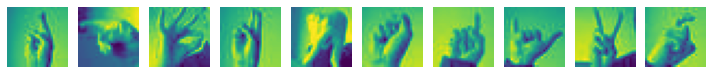

[16. 14.  5. 19. 15. 17.  3. 23. 20. 22.]


In [7]:
sample_training_images, sample_training_labels = next(train_generator)
plotImages(sample_training_images[:10])
print(sample_training_labels[:10])

From now implement your model.
<br>
Please add cells and explain yours developing steps and your results.

<div dir='rtl'style="text-align: right;font-family:verdana;">
برای توضیحات از زبان فارسی استفاده نمایید.
<br>
موفق باشید

</div>

<div dir='rtl'style="text-align: right;font-family:verdana;">
در اینجا ما از GPU نیز می توانیم استفاده کنیم تا سرعت اجرا افزایش پیدا کند.
<br />
همچنین، از Keras و Tensorflow استفاده کرده ایم.
</div>

In [8]:
import tensorflow as tf
import keras
from keras.callbacks import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import *
from keras import backend as K

In [9]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

<div dir='rtl'style="text-align: right;font-family:verdana;">
از آنجایی که دیتاست داده شده، دیتاست مشهوری میباشد، بهترین شبکه برای آن شبکه ای با فعال سازهای ReLU در لایه های میانی و فعال ساز SoftMax در لایه آخر است.
<br />
</div>

In [10]:
model=Sequential([])

model.add(Conv2D(64, (3, 3), activation = "relu", input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation = "relu", input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation = "relu"))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(256, activation = "relu"))
model.add(BatchNormalization())
model.add(Dense(26, activation = "softmax"))

<div dir='rtl'style="text-align: right;font-family:verdana;">
در توضیح مدل میتوانیم ببینیم که بیش از 800 هزار پارامتر داریم که حدود 5000 تای آنها غیر قابل آموزش و ما بقی قابل آموزش است. 
<br />
</div>

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 10, 10, 128)       5

<div dir='rtl'style="text-align: right;font-family:verdana;">
برای کامپایل مدل از تابع هزینه sparse_categorical_crossentropy به خاطر مسئله چند کلاسه بودن استفاده میکنیم
<br />
تابع بهینه ساز آدام استفاده میکنیم
<br />
معیار کارایی نیز دقت خواهد بود که به تعداد عکس ها با دسته بندی اشتباه اشاره خواهد کرد.
<br />
</div>

In [12]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['acc', 'accuracy',f1_m,precision_m, recall_m]) 

<div dir='rtl'style="text-align: right;font-family:verdana;">
بهترین دقتی که برای این دیتاست پیدا شده دقت 99.5 درصد است و اگر ما دقتی در حد یا بیشتر پیدا کردیم میتوانیم آموزش را متوقف کنیم.
    <br />
    به این صورت امکان overfitting وجود نخواهد داشت.
</div>

In [13]:
class stopTraining(Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') > 0.995):
      print("over 99% accuracy")
      self.model.stop_training = True
callback=stopTraining()

<div dir='rtl'style="text-align: right;font-family:verdana;">
برای توقف نوسان در یادگیری و بالا و پایین رفتن دقت، در هر epoch نرخ یادگیری را کاهش میدهیم.
</div>

In [14]:
# A lambda function is a small anonymous function.
learning_rate = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

In [15]:
trained_model = model.fit(train_generator, epochs=50, validation_data = validation_generator, callbacks = [callback, learning_rate])

Epoch 1/50
172/172 [==============================] - 119s 692ms/step - loss: 0.1667 - acc: 0.9592 - accuracy: 0.9592 - f1_m: 1.5032 - precision_m: 2.7371 - recall_m: 1.3888 - val_loss: 4.6866 - val_acc: 0.0766 - val_accuracy: 0.0766 - val_f1_m: 7.9273 - val_precision_m: 107.2751 - val_recall_m: 4.1573
Epoch 2/50
172/172 [==============================] - 16s 95ms/step - loss: 0.0018 - acc: 1.0000 - accuracy: 1.0000 - f1_m: 0.9792 - precision_m: 0.9591 - recall_m: 1.0002 - val_loss: 2.1280 - val_acc: 0.4202 - val_accuracy: 0.4202 - val_f1_m: 6.6239 - val_precision_m: 12.5558 - val_recall_m: 4.5169
Epoch 3/50
172/172 [==============================] - 17s 98ms/step - loss: 8.9150e-04 - acc: 1.0000 - accuracy: 1.0000 - f1_m: 0.9790 - precision_m: 0.9590 - recall_m: 1.0000 - val_loss: 0.0709 - val_acc: 0.9923 - val_accuracy: 0.9923 - val_f1_m: 1.2453 - val_precision_m: 1.2278 - val_recall_m: 1.2635
Epoch 4/50
172/172 [==============================] - 17s 97ms/step - loss: 5.5875e-04 - ac

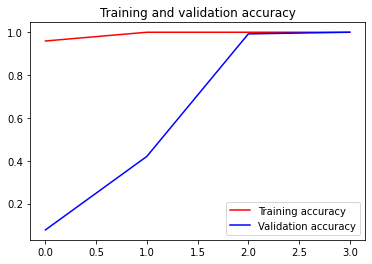

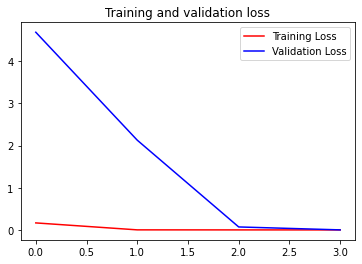

In [16]:
acc = trained_model.history['accuracy']
val_acc = trained_model.history['val_accuracy']
loss = trained_model.history['loss']
val_loss = trained_model.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [21]:
loss, accuracy, acc, f1_score, precision, recall = model.evaluate_generator(test_generator)

In [23]:
print("test accuracy: "+ str(accuracy * 100))
print("loss: "+ str(loss))
print("loss: "+ str(f1_score))
print("loss: "+ str(precision))
print("loss: "+ str(recall))

test accuracy: 95.73341012001038
loss: 0.14414504170417786
loss: 1.2300852537155151
loss: 1.2115411758422852
loss: 1.2495278120040894
